In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [5]:
# Base de dados
path = kagglehub.dataset_download("anandshaw2001/imdb-data")
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
print("Path to dataset files:", path)
os.listdir(path)

Path to dataset files: /root/.cache/kagglehub/datasets/anandshaw2001/imdb-data/versions/1


['Imdb Movie Dataset.csv']

In [6]:
df_movie = pd.read_csv(path + "/Imdb Movie Dataset.csv")
df_movie.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,7/15/2010,825532764,148,False,160000000,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,11/5/2014,701729206,169,False,165000000,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,7/16/2008,1004558444,152,False,185000000,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,12/15/2009,2923706026,162,False,237000000,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,4/25/2012,1518815515,143,False,220000000,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [7]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1048575 non-null  int64  
 1   title                 1048562 non-null  object 
 2   vote_average          1048575 non-null  float64
 3   vote_count            1048575 non-null  int64  
 4   status                1048575 non-null  object 
 5   release_date          866758 non-null   object 
 6   revenue               1048575 non-null  int64  
 7   runtime               1048575 non-null  int64  
 8   adult                 1048575 non-null  bool   
 9   budget                1048575 non-null  int64  
 10  imdb_id               560572 non-null   object 
 11  original_language     1048575 non-null  object 
 12  original_title        1048562 non-null  object 
 13  overview              832751 non-null   object 
 14  popularity            1048575 non-

In [8]:
df_movie.isnull().sum()

,0
id,0
title,13
vote_average,0
vote_count,0
status,0
release_date,181817
revenue,0
runtime,0
adult,0
budget,0


In [9]:
# Vamos adicionar unknown para os valores que não temos


colunas_para_mudar = [
    'keywords','spoken_languages','production_countries','production_companies',
    'genres','tagline','overview','original_title','imdb_id','release_date','title'
    ]

df_movie[colunas_para_mudar]=df_movie[colunas_para_mudar].fillna('unknown')

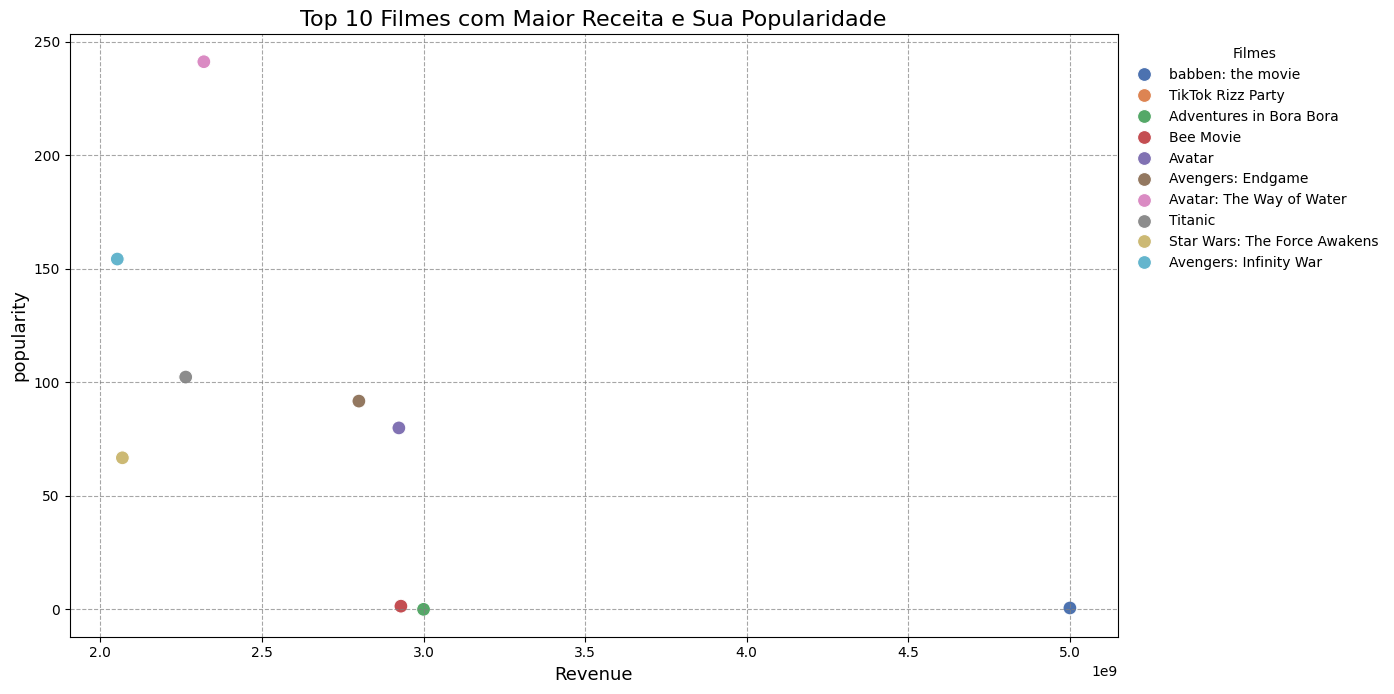

In [10]:
# Maiores receitas e sua popularidade
top_10 = df_movie[['popularity', 'revenue', 'title']].nlargest(10, 'revenue')

plt.figure(figsize=(14, 7))
sns.scatterplot(x='revenue', y='popularity', hue='title', data=top_10, palette='deep', s=100)
plt.title('Top 10 Filmes com Maior Receita e Sua Popularidade',fontsize=16)
plt.legend(title='Filmes', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)
plt.tight_layout()
plt.grid(True, axis='both', linestyle='--', color='gray', alpha=0.7)
plt.xlabel('Revenue', fontsize=13)
plt.ylabel('popularity', fontsize=13)
plt.show()

In [11]:
# Selecionar os top 10 filmes mais longos
longest_movies = df_movie[['title', 'runtime']].sort_values(by='runtime', ascending=False).head(10)

# Exibir os 10 filmes mais longos
print("Os 10 filmes mais longos(em minutos)")
print(longest_movies)


Os 10 filmes mais longos(em minutos)
                                                  title  runtime
188411                             Modern Times Forever    14400
105596                                        Cinématon    12480
337803                                     Beijing 2003     9000
943399                                      Matrjoschka     5700
221705                            The Cure For Insomnia     5220
105108                                     #ALLMYMOVIES     4320
343570                     Giant 600 Cartoon Collection     3720
335070  The Longest Most Meaningless Movie in the World     2880
898146                             350 Classic Cartoons     2400
244814    Rick Steves' Europe - The Complete Collection     2314


<ipython-input-12-81ec801050d8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='genres', data=df_generos.head(10), palette='viridis')


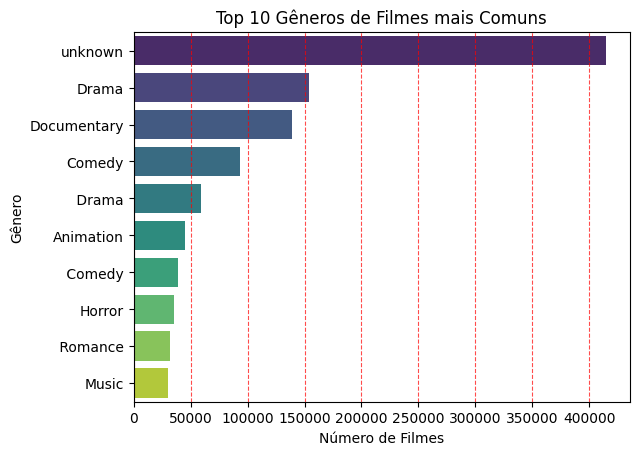

In [12]:
# Vamos contar quantos filmes temos de cada gênero
from collections import Counter

contador = Counter([genre for genres in df_movie['genres'] for genre in genres.split(',')])
df_generos = pd.DataFrame(contador.items(), columns=['genres', 'count'])
df_generos = df_generos.sort_values(by='count', ascending=False)

sns.barplot(x='count', y='genres', data=df_generos.head(10), palette='viridis')
plt.grid(True, axis='x', linestyle='--', color='red', alpha=0.7)
plt.title('Top 10 Gêneros de Filmes mais Comuns')
plt.xlabel('Número de Filmes')
plt.ylabel('Gênero')
plt.show()
# Como tinhamos muitos valores nulos unknown é o tipo de filme mais popular, vamos retirar esse valor e refazer o gráfico

<ipython-input-13-a48216521643>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='genres', data=df_generos.head(10), palette='viridis')


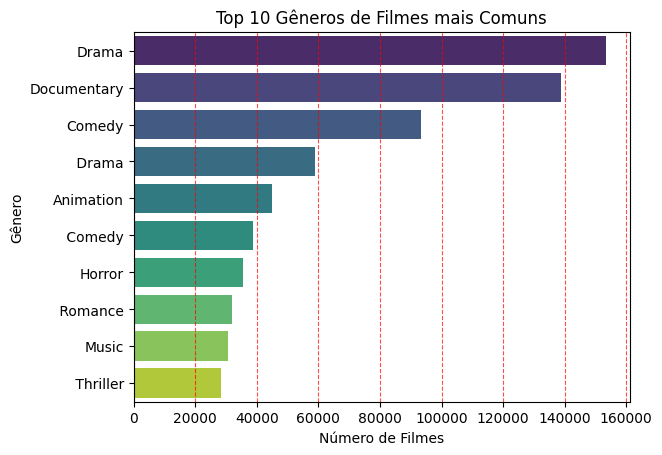

In [13]:
df_movie_filtered = df_movie[~df_movie['genres'].str.contains('unknow', case=False, na=False)]

contador = Counter([genre for genres in df_movie_filtered['genres'] for genre in genres.split(',')])
df_generos = pd.DataFrame(contador.items(), columns=['genres', 'count'])
df_generos = df_generos.sort_values(by='count', ascending=False)

sns.barplot(x='count', y='genres', data=df_generos.head(10), palette='viridis')
plt.grid(True, axis='x', linestyle='--', color='red', alpha=0.7)
plt.title('Top 10 Gêneros de Filmes mais Comuns')
plt.xlabel('Número de Filmes')
plt.ylabel('Gênero')
plt.show()



In [14]:
adult_movies = df_movie[df_movie['adult'] == True]
non_adult_movies = df_movie[df_movie['adult'] == False]

print(f'Média de Receita de Filmes para Adultos: {adult_movies["revenue"].mean()}')
print(f'Média de Receita de Filmes Não-Adultos: {non_adult_movies["revenue"].mean()}')


Média de Receita de Filmes para Adultos: 56915.13176664605
Média de Receita de Filmes Não-Adultos: 832139.2593018796
